#**PTC5892 -  PROCESSAMENTO DE IMAGENS MÉDICAS**

##**Trabalho: Segmentação de imagens de USG por redes neurais utilizando a arquitetura U-Net**

### Jones Egydio
####jones.egydio@usp.br



## Setup Python

In [1]:
import os
import numpy as np
import pandas as pd

# Importação da biblioteca 're', que oferece suporte para expressões regulares.
# Ela é útil para manipular e buscar padrões em strings.
import re

import matplotlib.pyplot as plt

# Importação da biblioteca 'cv2', que é o módulo Python para o OpenCV
# (Open Source Computer Vision Library). É uma biblioteca popular para
# processamento de imagens e visão computacional.
import cv2

import tensorflow as tf

# Estabilizar e padronizar as respostas deste notebook.
np.random.seed(42)
tf.random.set_seed(42)

## Definindo um frame para armazenagem das imagens e seus rótulos

In [2]:
Dic_DS_Train = {'img' : [],
                'mask' : []
                }

**Obs.:**

Esse código cria outra estrutura de dados chamada `Dic_DS_Train`. É um dicionário com duas chaves (`img` e `mask`).

Essa estrutura também é usada para armazenar imagens e suas respectivas máscaras. As chaves `img` e `mask` associam-se a listas vazias onde os dados podem ser armazenados posteriormente.

Para utilizar efetivamente essa estrutura, será necessário preencher as listas `img` e `mask` com os dados reais, o que pode ser feito por meio da adição de elementos às listas. Depois de armazenar os dados, será possível trabalhar com eles ou processá-los de acordo com os requisitos da aplicação específica.

## Carregando as imagens do dataset

In [3]:
def Load_Data(frame_Obj = None, img_PATH = None, mask_PATH = None, shape = 256):

    img_names = os.listdir(img_PATH)

    names = []
    mask_names = []
    unames = []

    for i in range(len(img_names)):
        unames.append(img_names[i].split(')')[0])

    unames = list(set(unames))

    for i in range(len(unames)):
        names.append(unames[i]+').png')
        mask_names.append(unames[i]+')_mask.png')

    img_addr = img_PATH + '/'
    mask_addr = mask_PATH + '/'

    for i in range (len(names)):
        img = plt.imread(img_addr + names[i])
        mask = plt.imread(mask_addr + mask_names[i])

        img = cv2.resize(img, (shape, shape))
        mask = cv2.resize(mask, (shape, shape))

        frame_Obj['img'].append(img)
        frame_Obj['mask'].append(mask)

    return frame_Obj

**Obs.:**

Esse código é uma função chamada `Load_Data`, que tem a finalidade de carregar dados de imagens e suas respectivas máscaras para um objeto chamado `frame_Obj`. A função recebe quatro parâmetros:

1. `frame_Obj`: É um dicionário que armazena os dados de imagens e máscaras.
2. `img_PATH`: É o caminho (path) onde estão localizadas as imagens.
3. `mask_PATH`: É o caminho onde estão localizadas as máscaras.
4. `shape`: É um valor inteiro que representa o tamanho para o redimensionamento das imagens e máscaras.

Aqui estão os passos realizados pela função:

1. Primeiro, a função lista todos os nomes dos arquivos de imagem no diretório especificado em `img_PATH` usando `os.listdir(img_PATH)` e os armazena em uma variável chamada `img_names`.

2. A função cria três listas vazias: `names`, `mask_names` e `unames`. `names` conterá os nomes dos arquivos de imagem, `mask_names` conterá os nomes dos arquivos de máscara e `unames` conterá os nomes únicos (sem duplicatas) das imagens (antes do `')'` no nome).

3. Em seguida, a função percorre a lista `img_names`, extrai o nome único de cada imagem (removendo o `')'` e o sufixo `'.png'`) e adiciona-o à lista `unames`.

4. Depois, a função converte unames em um conjunto (set) para eliminar duplicatas e, em seguida, novamente em uma lista, para que agora `unames` contenha apenas os nomes únicos de imagens.

5. Agora, a função cria os nomes completos dos arquivos de imagem e máscara, adicionando o `')'` e o sufixo `'_mask.png'` aos nomes únicos, e armazena-os nas listas `names` e `mask_names`, respectivamente.

6. Em seguida, a função prepara os caminhos completos (endereços) para cada imagem e máscara, concatenando `img_addr` (que é o caminho para o diretório de imagens) e `mask_addr` (caminho para o diretório de máscaras) com os nomes completos de cada imagem e máscara, respectivamente.

7. Agora, a função percorre cada par de imagens e máscaras (representados pelos nomes em `names` e `mask_names`) e carrega as imagens usando `plt.imread()` da biblioteca `Matplotlib` e as máscaras usando a biblioteca OpenCV `(cv2.imread())`.

8. Cada imagem e máscara são redimensionadas para o tamanho especificado em shape usando `cv2.resize()`.

9. Finalmente, as imagens e as máscaras ambas redimensionadas são adicionadas às listas `'img'` e `'mask'` do objeto `frame_Obj`, respectivamente.

10. A função retorna o objeto `frame_Obj` após adicionar todas as imagens e máscaras a ele.









Exemplos das imagens do Dataset (tumores benignos)::

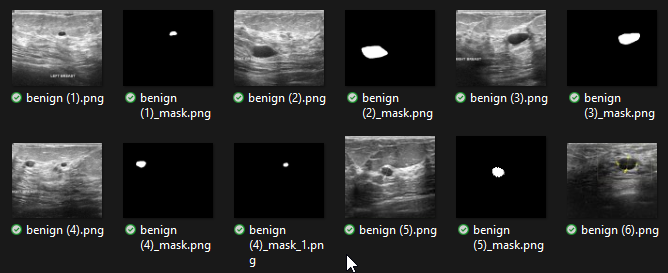

## Carregando imagens de tumores benignos

In [4]:
# Caminho (path) para o diretório que contém as imagens de tumores benignos.
benign_PATH = '/content/drive/MyDrive/Colab Notebooks/[2023] PTC5892/Dataset_IMG_USG/benign'

# Chamando a função Load_Data para carregar os dados das imagens de tumores benignos.
# A função Load_Data está sendo chamada com os seguintes argumentos:
# - Dic_DS_Train: É o dicionário que armazenará os dados das imagens e máscaras de treinamento.
# - img_PATH: É o caminho para o diretório de imagens de tumores benignos.
# - mask_PATH: É o caminho para o diretório de máscaras de tumores benignos (nesse caso, os nomes das imagens e máscaras são os mesmos).
# - shape: É o tamanho para o redimensionamento das imagens e máscaras (256x256).

Dic_DS_Train = Load_Data(Dic_DS_Train,
                         img_PATH=benign_PATH,
                         mask_PATH=benign_PATH,
                         shape=256)


In [5]:
num_images = len(Dic_DS_Train['img'])
num_masks = len(Dic_DS_Train['mask'])

print("Número de imagens:", num_images)
print("Número de máscaras:", num_masks)
print(Dic_DS_Train['mask'][0].shape)

Número de imagens: 437
Número de máscaras: 437
(256, 256)


In [6]:
num_elements = len(Dic_DS_Train)
print("Número de elementos no dicionário Dic_DS_Train:", num_elements)

Número de elementos no dicionário Dic_DS_Train: 2


**Obs.:**

Esse código está utilizando a função `Load_Data` mencionada anteriormente para carregar as imagens e máscaras de tumores benignos presentes no diretório especificado em `benign_PATH`. O resultado dessa operação é armazenado no objeto `Dic_DS_Train`, que é um dicionário utilizado para armazenar os dados das imagens e máscaras de treinamento.

## Carrgando imagens de tumores malignos

In [7]:
# Caminho (path) para o diretório que contém as imagens de tumores malignos.
malignant_PATH = '/content/drive/MyDrive/Colab Notebooks/[2023] PTC5892/Dataset_IMG_USG/malignant'

# Chamando a função Load_Data para carregar os dados das imagens de tumores malignos.
# A função Load_Data está sendo chamada com os seguintes argumentos:
# - Dic_DS_Train: É o dicionário que armazenará os dados das imagens e máscaras de treinamento.
# Nesse caso, o dicionário já pode conter dados de tumores benignos carregados anteriormente.
# - img_PATH: É o caminho para o diretório de imagens de tumores malignos.
# - mask_PATH: É o caminho para o diretório de máscaras de tumores malignos (nesse caso, os nomes das imagens e máscaras são os mesmos).
# - shape: É o tamanho para o redimensionamento das imagens e máscaras (256x256).

Dic_DS_Train = Load_Data(Dic_DS_Train,
                         img_PATH = malignant_PATH,
                         mask_PATH = malignant_PATH,
                         shape = 256)

In [8]:
num_images = len(Dic_DS_Train['img'])
num_masks = len(Dic_DS_Train['mask'])

print("Número de imagens:", num_images)
print("Número de máscaras:", num_masks)
print(Dic_DS_Train['mask'][0].shape)

Número de imagens: 647
Número de máscaras: 647
(256, 256)


In [9]:
num_elements = len(Dic_DS_Train)
print("Número de elementos no dicionário Dic_DS_Train:", num_elements)

Número de elementos no dicionário Dic_DS_Train: 2


**Obs.:**

Esse código utiliza a função `Load_Data` novamente, assim como os trechos de código anteriores, mas agora para carregar as imagens e máscaras de tumores malignos presentes no diretório especificado em `malignant_PATH`. O resultado dessa operação é armazenado novamente no objeto `Dic_DS_Train`, que já contém dados das imagens e máscaras de tumores benignos carregados anteriormente.

## Analisando as imagens do dataset

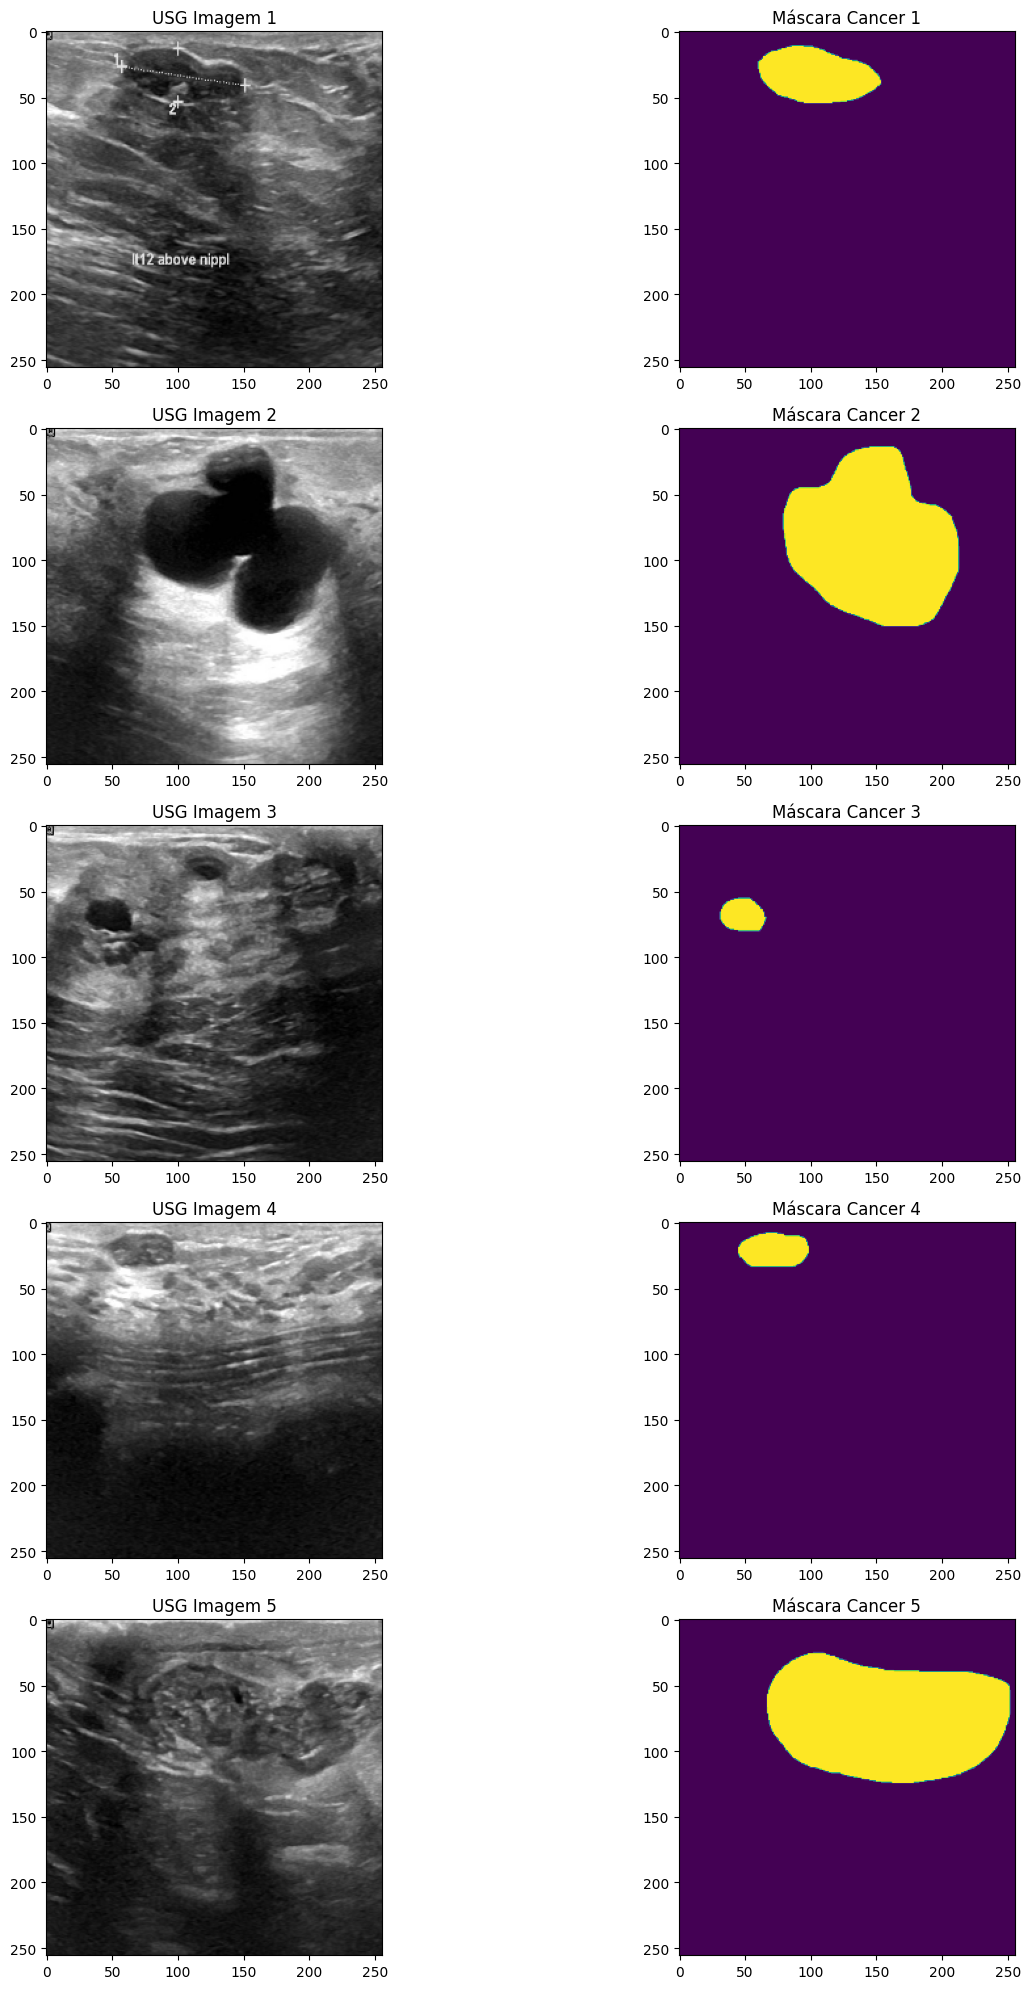

In [10]:
# Define o tamanho da figura para o gráfico como 15 unidades de largura e 20 unidades de altura.
plt.figure(figsize=(15, 20))

# Número total de imagens a serem exibidas
num_images = 5

# Loop para criar os subplots
for i in range(num_images):
    # Índice da imagem (lembre-se de garantir que o índice seja válido)
    img_idx = i

    # Define o número do subplot de acordo com o índice da imagem
    plt.subplot(num_images, 2, 2 * i + 1)

    # Mostra a imagem armazenada no índice 'img_idx' da lista 'img' do dicionário 'Dic_DS_Train'.
    plt.imshow(Dic_DS_Train['img'][img_idx])

    # Define um título para o subplot.
    plt.title(f'USG Imagem {img_idx + 1}')

    # Define outro subplot e ativa o próximo.
    plt.subplot(num_images, 2, 2 * i + 2)

    # Mostra a máscara (imagem) armazenada no índice 'img_idx' da lista 'mask' do dicionário 'Dic_DS_Train'.
    plt.imshow(Dic_DS_Train['mask'][img_idx])

    # Define um título para o subplot.
    plt.title(f'Máscara Cancer {img_idx + 1}')

# Exibe os subplots criados, mostrando as imagens lado a lado.
plt.tight_layout()  # Para ajustar o espaçamento entre os subplots
plt.show()

## Desenvolvimento da U-Net

In [11]:
###############################################################################
#                              Modelo - Rede Neural                           #
###############################################################################


# Código para realização das convoluções da U-Net

def Conv2dBlock(inputTensor, numFilters, kernelSize = 3, doBatchNorm = True):
    #1a Convolução
    x = tf.keras.layers.Conv2D(filters = numFilters,
                              kernel_size = (kernelSize, kernelSize),
                              kernel_initializer = 'he_normal',
                              padding = 'same') (inputTensor)

    if doBatchNorm:
        x = tf.keras.layers.BatchNormalization()(x)

    x =tf.keras.layers.Activation('relu')(x)

    #2a Convolução
    x = tf.keras.layers.Conv2D(filters = numFilters,
                               kernel_size = (kernelSize, kernelSize),
                               kernel_initializer = 'he_normal',
                               padding = 'same') (x)
    if doBatchNorm:
        x = tf.keras.layers.BatchNormalization()(x)

    x = tf.keras.layers.Activation('relu')(x)

    return x


# Definindo a U-net

def NN_Unet(inputImage, numFilters = 16, droupouts = 0.1, doBatchNorm = True):

    # encoder Path
    c1 = Conv2dBlock(inputImage, numFilters * 1, kernelSize = 3,
                     doBatchNorm = doBatchNorm)
    p1 = tf.keras.layers.MaxPooling2D((2,2))(c1)
    p1 = tf.keras.layers.Dropout(droupouts)(p1)

    c2 = Conv2dBlock(p1, numFilters * 2, kernelSize = 3,
                     doBatchNorm = doBatchNorm)
    p2 = tf.keras.layers.MaxPooling2D((2,2))(c2)
    p2 = tf.keras.layers.Dropout(droupouts)(p2)

    c3 = Conv2dBlock(p2, numFilters * 4, kernelSize = 3,
                     doBatchNorm = doBatchNorm)
    p3 = tf.keras.layers.MaxPooling2D((2,2))(c3)
    p3 = tf.keras.layers.Dropout(droupouts)(p3)

    c4 = Conv2dBlock(p3, numFilters * 8, kernelSize = 3,
                     doBatchNorm = doBatchNorm)
    p4 = tf.keras.layers.MaxPooling2D((2,2))(c4)
    p4 = tf.keras.layers.Dropout(droupouts)(p4)

    c5 = Conv2dBlock(p4, numFilters * 16, kernelSize = 3,
                     doBatchNorm = doBatchNorm)

    # decoder path
    u6 = tf.keras.layers.Conv2DTranspose(numFilters*8, (3, 3),
                                         strides = (2, 2), padding = 'same')(c5)
    u6 = tf.keras.layers.concatenate([u6, c4])
    u6 = tf.keras.layers.Dropout(droupouts)(u6)
    c6 = Conv2dBlock(u6, numFilters * 8, kernelSize = 3, doBatchNorm = doBatchNorm)

    u7 = tf.keras.layers.Conv2DTranspose(numFilters*4, (3, 3),
                                         strides = (2, 2), padding = 'same')(c6)

    u7 = tf.keras.layers.concatenate([u7, c3])
    u7 = tf.keras.layers.Dropout(droupouts)(u7)
    c7 = Conv2dBlock(u7, numFilters * 4, kernelSize = 3, doBatchNorm = doBatchNorm)

    u8 = tf.keras.layers.Conv2DTranspose(numFilters*2, (3, 3),
                                         strides = (2, 2), padding = 'same')(c7)
    u8 = tf.keras.layers.concatenate([u8, c2])
    u8 = tf.keras.layers.Dropout(droupouts)(u8)
    c8 = Conv2dBlock(u8, numFilters * 2, kernelSize = 3, doBatchNorm = doBatchNorm)

    u9 = tf.keras.layers.Conv2DTranspose(numFilters*1, (3, 3),
                                         strides = (2, 2), padding = 'same')(c8)
    u9 = tf.keras.layers.concatenate([u9, c1])
    u9 = tf.keras.layers.Dropout(droupouts)(u9)
    c9 = Conv2dBlock(u9, numFilters * 1, kernelSize = 3, doBatchNorm = doBatchNorm)

    output = tf.keras.layers.Conv2D(1, (1, 1), activation = 'sigmoid')(c9)
    model = tf.keras.Model(inputs = [inputImage], outputs = [output])
    return model

Esse código é uma implementação da arquitetura da U-Net para realizar segmentação de imagens. A U-Net é uma rede neural convolucional (CNN) usada para segmentação de imagens, onde o objetivo é segmentar diferentes objetos de interesse em uma imagem.

O código define duas funções: `Conv2dBlock` e `NN_Unet`.

A função `Conv2dBlock` é responsável por definir um bloco de convolução, que consiste em duas camadas convolucionais seguidas por ativação ReLU e, opcionalmente, normalização em lote (Batch Normalization).

A função `NN_Unet` é responsável por construir a arquitetura da U-Net. Ela segue o padrão de uma U invertida, com uma parte "encoder" para extrair características da imagem e uma parte "decoder" para fazer a reconstrução da imagem segmentada a partir das características aprendidas. A U-Net possui conexões de salto (skip connections), que concatenam os mapas de características do "encoder" com os do "decoder", permitindo que a rede se beneficie de informações de diferentes escalas.

A arquitetura da U-Net é composta por:

1. Parte "encoder":

  * Camadas convolucionais com aumento progressivo do número de filtros (a variável `numFilters` controla esse aumento).
  * Camadas de pooling (max pooling) para reduzir a resolução da imagem.

2. Parte "decoder":

  * Camadas de convolução transposta (upsampling) para aumentar a resolução da imagem.
  * Conexões de salto (skip connections) que combinam os mapas de características do "encoder" com os do "decoder".
  * Camadas de convolução adicionais para refinar a segmentação final.

3. Camada de saída:

  * Uma camada convolucional com ativação sigmoid para gerar a máscara binária da imagem segmentada.
  
Essa arquitetura é especialmente útil em tarefas de segmentação de imagens médicas, como segmentação de tumores em imagens de ultrassom, ressonância magnética ou outras modalidades.

A arquitetura da U-Net foi projetada para resolver o problema específico de segmentação semântica de imagens, onde o objetivo é segmentar diferentes objetos ou regiões de interesse em uma imagem. A U-Net foi originalmente proposta por Olaf Ronneberger, Philipp Fischer e Thomas Brox em 2015, e seu nome deriva da forma de sua estrutura, que se assemelha à letra "U".

A U-Net possui duas principais características que a tornam adequada para a tarefa de segmentação:

1. Conexões de salto (skip connections): Essas conexões conectam as camadas do "encoder" (encarregadas de extrair características) diretamente às camadas correspondentes do "decoder" (encarregadas de reconstruir a imagem segmentada a partir das características). Isso permite que informações de diferentes escalas sejam incorporadas durante o processo de reconstrução. As conexões de salto também evitam o desaparecimento do gradiente (vanishing gradient problem), permitindo um treinamento mais estável.

2. Função de perda baseada na medida de Jaccard (ou IoU - Intersection over Union): A função de perda Jaccard/IoU mede a sobreposição entre as máscaras previstas e as máscaras reais. Essa medida é mais adequada para a tarefa de segmentação, pois leva em consideração tanto os verdadeiros positivos quanto os falsos positivos e falsos negativos. O uso dessa função de perda ajuda o modelo a se concentrar em obter precisão na segmentação.

A combinação dessas características permite que a U-Net seja capaz de aprender a segmentar objetos em diferentes escalas e capturar detalhes importantes para a tarefa de segmentação de imagens.

Além disso, a arquitetura da U-Net pode ser facilmente adaptada e ajustada para diferentes tarefas de segmentação, incluindo segmentação de imagens médicas, segmentação de objetos em imagens naturais, segmentação de células em microscopia, entre outras.

Desde sua criação, a U-Net se tornou uma das arquiteturas mais populares para tarefas de segmentação de imagens, e várias variantes e melhorias têm sido propostas ao longo dos anos para torná-la ainda mais eficiente e precisa. Sua simplicidade e eficácia a tornam uma escolha atraente em muitos cenários de segmentação de imagens.

**Obs.:**

Esse código define duas funções relacionadas à construção de um modelo **U-Net**, uma arquitetura amplamente utilizada em tarefas de segmentação de imagens. Vou comentar cada função:


1. `def Conv2dBlock(inputTensor, numFilters, kernelSize=3, doBatchNorm=True)`: Essa função representa um bloco de convolução usado na arquitetura U-Net. Recebe como entrada um `inputTensor`, que é uma imagem ou recurso de entrada, `numFilters`, que é o número de filtros (ou canais) a serem aplicados na convolução, `kernelSize`, que é o tamanho do kernel da convolução (3x3 por padrão) e `doBatchNorm`, um booleano que indica se será aplicada normalização em lote (batch normalization) após cada camada de convolução.

  A função executa as seguintes etapas:



* Realiza uma convolução 2D com `numFilters` filtros e tamanho de kernel `kernelSize` sobre o `inputTensor`.
* Se `doBatchNorm` for `True`, aplica normalização em lote (`batch normalization`) ao resultado da convolução.
* Aplica uma função de ativação ReLU ao tensor resultante.
* Retorna o tensor resultante após a ativação.

2. `def NN_Unet(inputImage, numFilters=16, droupouts=0.1, doBatchNorm=True)`: Essa função constrói a arquitetura U-Net completa, que é uma rede neural para segmentação de imagens. Recebe como entrada `inputImage`, que é a imagem de entrada para o modelo, `numFilters`, que é o número inicial de filtros a serem usados nos blocos de convolução, `droupouts`, a taxa de dropout a ser aplicada após as camadas de pooling, e `doBatchNorm`, um booleano que indica se a normalização em lote será aplicada.

  A função executa as seguintes etapas:

* Usa a função `Conv2dBlock` para construir a parte do codificador (encoder) da U-Net, com várias camadas convolucionais e pooling para reduzir a resolução espacial da imagem.

* Em seguida, utiliza camadas de convolução transposta (`Conv2DTranspose`) para construir a parte do decodificador (decoder) da U-Net, com várias camadas convolucionais e operações de concatenação para aumentar a resolução espacial da imagem.

* A saída do modelo é obtida através de uma convolução final com uma camada convolucional de 1x1 e ativação sigmoidal, que é comum em tarefas de segmentação para obter a máscara binária da imagem.

* Retorna o modelo U-Net completo.

Essas funções são úteis para a construção do modelo de segmentação de imagens U-Net. O modelo é composto por camadas convolucionais, operações de pooling e transposição, e pode ser usado para realizar tarefas de segmentação de objetos em imagens médicas, detecção de objetos e muito mais.

In [12]:
# Criando uma instância da U-Net
input_shape = (256, 256, 3)
model = NN_Unet(tf.keras.layers.Input(shape=input_shape))

# Obtendo o resumo dos parâmetros da rede
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 256, 256, 16  64         ['conv2d[0][0]']                 
 alization)                     )                                                             

Portanto, em resumo, teremos:

1. `Conv2dBlock`: É uma função que constrói um bloco de convolução com duas camadas convolucionais seguidas de ativação ReLU. Cada bloco recebe um tensor de entrada, aplica convoluções e, opcionalmente, normalização em lote, retornando o tensor resultante após a ativação ReLU.

2. `NN_Unet`: É uma função que constrói a arquitetura U-Net completa para segmentação de imagens. A U-Net é dividida em um codificador (encoder) e um decodificador (decoder) conectados por camadas de convolução transposta. O codificador reduz a resolução espacial da imagem, enquanto o decodificador aumenta a resolução para obter a máscara segmentada.

3. Codificador (Encoder): Constrói camadas convolucionais seguidas por operações de pooling para reduzir a resolução da imagem. As camadas convolucionais (Conv2dBlock) aumentam o número de filtros em múltiplos de 2 a cada camada.

4. Decodificador (Decoder): Constrói camadas de convolução transposta (Conv2DTranspose) que aumentam a resolução espacial da imagem. As camadas de convolução transposta (Conv2DTranspose) reduzem o número de filtros em múltiplos de 2 a cada camada. Também usa operações de concatenação para combinar os recursos do codificador com o decodificador.

5. Saída: A saída é obtida através de uma convolução final com uma camada convolucional de 1x1 e ativação sigmoidal. Isso produz uma máscara binária que indica as áreas segmentadas da imagem original.

In [13]:
# Criando e compilando um modelo de segmentação de imagens usando a arquitetura U-Net
inputs = tf.keras.layers.Input((256, 256, 3))
Unet_Trans = NN_Unet(inputs, droupouts= 0.07)
Unet_Trans.compile(optimizer = 'Adam', loss = 'binary_crossentropy',
                   metrics = ['accuracy'] )

**Obs.:**

Esse código cria e compila um modelo de segmentação de imagens usando a arquitetura U-Net, que é construída através de uma função chamada NN_Unet. Vou explicar cada linha:

1. `inputs = tf.keras.layers.Input((256, 256, 3))`: Aqui, uma camada de entrada é definida usando `tf.keras.layers.Input`. O modelo espera imagens com altura e largura de 256 pixels e 3 canais de cores (RGB), portanto, o formato é `(256, 256, 3)`.

2. `Unet_Trans = NN_Unet(inputs, droupouts=0.07)`: Nesta linha, a função `NN_Unet` é chamada para construir o modelo U-Net completo. O argumento `inputs` é passado como a camada de entrada do modelo, e o valor de `droupouts` é definido como `0.07`, que representa a taxa de dropout a ser aplicada após as camadas de pooling durante o treinamento.

3. `Unet_Trans.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])`: Após a construção do modelo, ele é compilado para especificar o otimizador, a função de perda e as métricas usadas durante o treinamento.

  * `optimizer='Adam'`: O otimizador usado é o `Adam`, que é um algoritmo de otimização comum usado em tarefas de aprendizado profundo para ajustar os pesos da rede neural durante o treinamento.

  * `loss='binary_crossentropy'`: A função de perda usada é a entropia cruzada binária, que é frequentemente usada em tarefas de classificação binária, como a segmentação de imagens onde a saída é uma máscara binária indicando pixels de objeto e fundo.

  * `metrics=['accuracy']`: A métrica de desempenho usada durante o treinamento é a acurácia, que mede a proporção de imagens corretamente segmentadas em relação ao total.

Agora, o modelo U-Net foi criado, com todas as camadas de convolução, pooling e transposição definidas pela função `NN_Unet`, e o modelo está pronto para ser treinado usando os dados de treinamento para realizar a tarefa de segmentação de imagens. O modelo será treinado para minimizar a função de perda (entropia cruzada binária) usando o otimizador Adam, enquanto monitora a acurácia durante o treinamento. Note que a nomenclatura "Unet_Trans" foi usada para armazenar o modelo compilado.

## Treinamento da rede

In [14]:
from sklearn.model_selection import train_test_split

# Separar as imagens e máscaras do dicionário em arrays numpy
images = np.array(Dic_DS_Train['img'])
masks = np.array(Dic_DS_Train['mask'])

# Dividir o conjunto de dados em treino e teste (80% treino, 20% teste)
images_train, images_test, masks_train, masks_test = train_test_split(images, masks, test_size=0.2, random_state=42)

# Dividir o conjunto de treino em treino e validação (80% treino, 20% validação)
images_train, images_val, masks_train, masks_val = train_test_split(images_train, masks_train, test_size=0.2, random_state=42)

# Agora temos os conjuntos de treino, teste e validação separados:
# images_train, masks_train - Conjunto de treino
# images_val, masks_val - Conjunto de validação
# images_test, masks_test - Conjunto de teste

# Verificar os formatos dos conjuntos de treinamento e teste
print('{:<25} {:<10}'.format('Data', 'Shape'))
print('-'*35)
print('{:<25} {:<10}'.format('Imagens de Treinamento', str(images_train.shape)))
print('{:<25} {:<10}'.format('Máscaras de Treinamento', str(masks_train.shape)))
print('{:<25} {:<10}'.format('Imagens de Validação', str(images_val.shape)))
print('{:<25} {:<10}'.format('Máscaras de Validação', str(masks_val.shape)))
print('{:<25} {:<10}'.format('Imagens de Teste', str(images_test.shape)))
print('{:<25} {:<10}'.format('Máscaras de Teste', str(masks_test.shape)))


Data                      Shape     
-----------------------------------
Imagens de Treinamento    (413, 256, 256, 3)
Máscaras de Treinamento   (413, 256, 256)
Imagens de Validação      (104, 256, 256, 3)
Máscaras de Validação     (104, 256, 256)
Imagens de Teste          (130, 256, 256, 3)
Máscaras de Teste         (130, 256, 256)


In [15]:
# Criar o modelo da U-Net
input_shape = (256, 256, 3)  # Defina o shape de entrada de acordo com as suas imagens
model = NN_Unet(tf.keras.Input(shape=input_shape))

# Compilar o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Realizar o treinamento
batch_size = 16
epochs = 50
history = model.fit(images_train, masks_train, batch_size=batch_size,
                    epochs=epochs, validation_data=(images_val, masks_val))

# Avaliar o desempenho final no conjunto de teste
test_loss, test_accuracy = model.evaluate(images_test, masks_test)

print('{:<15} {:<10}'.format('Metric', 'Value'))
print('-'*25)
print('{:<15} {:<10}'.format('Test Loss', str(test_loss)))
print('{:<15} {:<10}'.format('Test Accuracy', str(test_accuracy)))

Epoch 1/50
26/26 [==============================] - 30s 177ms/step - loss: 0.5750 - accuracy: 0.7541 - val_loss: 13.5356 - val_accuracy: 0.0925
Epoch 2/50
26/26 [==============================] - 2s 90ms/step - loss: 0.4030 - accuracy: 0.9090 - val_loss: 10.5655 - val_accuracy: 0.1796
Epoch 3/50
26/26 [==============================] - 2s 88ms/step - loss: 0.3550 - accuracy: 0.9116 - val_loss: 9.7409 - val_accuracy: 0.1769
Epoch 4/50
26/26 [==============================] - 2s 89ms/step - loss: 0.3098 - accuracy: 0.9235 - val_loss: 10.1987 - val_accuracy: 0.2058
Epoch 5/50
26/26 [==============================] - 2s 89ms/step - loss: 0.2755 - accuracy: 0.9257 - val_loss: 1.1768 - val_accuracy: 0.6160
Epoch 6/50
26/26 [==============================] - 2s 89ms/step - loss: 0.2484 - accuracy: 0.9309 - val_loss: 5.9543 - val_accuracy: 0.3343
Epoch 7/50
26/26 [==============================] - 2s 90ms/step - loss: 0.2278 - accuracy: 0.9340 - val_loss: 1.3641 - val_accuracy: 0.5863
Epoch 8/

O código é de uma arquitetura de Rede Neural Convolucional chamada U-Net para resolver uma tarefa de segmentação de imagens. A U-Net é uma arquitetura popular para segmentação de imagens devido à sua capacidade de capturar contextos de alto nível e detalhes de nível baixo nas imagens. Aqui estão os comentários linha a linha:

1. `input_shape = (256, 256, 3)` - Esta linha define o formato da entrada para a rede. Neste caso, as imagens de entrada são 256x256 pixels e têm 3 canais de cores (RGB).

2. `model = NN_Unet(tf.keras.Input(shape=input_shape))` - Aqui, um modelo U-Net é construído utilizando o formato de entrada especificado. A função `NN_Unet` provavelmente está definida em outra parte do código e está construindo a arquitetura U-Net.

3. `model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])` - O modelo é compilado utilizando o otimizador Adam, uma função de perda de entropia cruzada binária, e rastreando a métrica de precisão.

4. `batch_size = 16` - O tamanho do lote é definido como 16, o que significa que 16 amostras serão passadas através da rede de uma vez antes que os pesos sejam atualizados.

5. `epochs = 50` - O número de épocas (ciclos completos através do conjunto de treinamento) é definido como 50.

6. `history = model.fit(images_train, masks_train, batch_size=batch_size, epochs=epochs, validation_data=(images_val, masks_val))` - O modelo é treinado usando os dados de treinamento e máscaras. O desempenho do modelo é validado em um conjunto de dados de validação.

7. `test_loss, test_accuracy = model.evaluate(images_test, masks_test)` - O desempenho do modelo é avaliado no conjunto de teste. A perda de teste e a precisão de teste são armazenadas para análise posterior.

8. `print(f'Test Loss: {test_loss}')` e `print(f'Test Accuracy: {test_accuracy}')` - A perda de teste e a precisão de teste são impressas para visualização.

Nota: A segmentação de imagens é uma tarefa que envolve a classificação de cada pixel em uma imagem. Neste caso, a tarefa é uma segmentação binária, onde cada pixel é classificado como pertencente a um de dois classes. As máscaras de treinamento, validação e teste são provavelmente imagens binárias onde os pixels pertencentes à classe de interesse são marcados de uma maneira (por exemplo, branco) e todos os outros pixels são marcados de outra maneira (por exemplo, preto).

## Teste e Métricas

In [16]:
def dice_coefficient(y_true, y_pred, smooth=1e-7):
    intersection = tf.reduce_sum(y_true * y_pred)
    union = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred)
    dice = (2. * intersection + smooth) / (union + smooth)
    return dice

def jaccard_index(y_true, y_pred, smooth=1e-7):
    intersection = tf.reduce_sum(y_true * y_pred)
    union = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) - intersection
    jaccard = (intersection + smooth) / (union + smooth)
    return jaccard

def mean_iou(y_true, y_pred, num_classes=2):
    iou_values = []
    for i in range(num_classes):
        true_mask = tf.cast(tf.equal(y_true, i), tf.float32)
        pred_mask = tf.cast(tf.equal(y_pred, i), tf.float32)
        intersection = tf.reduce_sum(true_mask * pred_mask)
        union = tf.reduce_sum(true_mask) + tf.reduce_sum(pred_mask) - intersection
        iou = (intersection + 1e-7) / (union + 1e-7)
        iou_values.append(iou)
    mean_iou = tf.reduce_mean(iou_values)
    return mean_iou

In [17]:
from scipy.spatial.distance import directed_hausdorff

# Avaliar o desempenho final no conjunto de teste
test_loss, test_accuracy = model.evaluate(images_test, masks_test)

# Fazer predições no conjunto de teste
y_pred = model.predict(images_test)
y_pred = np.round(y_pred)  # Arredondar as predições para obter valores binários (0 ou 1)

# As máscaras de teste e predições devem ter o mesmo formato (256, 256, 1)
masks_test = np.expand_dims(masks_test, axis=-1)
y_pred = np.round(y_pred)

# Converter as máscaras de teste e predições para formato TensorFlow
y_true_tf = tf.convert_to_tensor(masks_test, dtype=tf.float32)
y_pred_tf = tf.convert_to_tensor(y_pred, dtype=tf.float32)

# Arredondar as máscaras verdadeiras para garantir que sejam binárias
y_true_tf = tf.cast(tf.round(y_true_tf), dtype=tf.float32)

# Reduzir a dimensão se o rank for maior que 5
if len(y_true_tf.shape) > 5:
    y_true_tf = tf.reshape(y_true_tf, [y_true_tf.shape[0], -1])
if len(y_pred_tf.shape) > 5:
    y_pred_tf = tf.reshape(y_pred_tf, [y_pred_tf.shape[0], -1])

# Arredondar as máscaras verdadeiras para garantir que sejam binárias
y_true_tf = tf.cast(tf.round(y_true_tf), dtype=tf.float32)

# Calcular as métricas
dice_score = dice_coefficient(y_true_tf, y_pred_tf)
jaccard_score = jaccard_index(y_true_tf, y_pred_tf)
miou_score = mean_iou(y_true_tf, y_pred_tf)

# Calcular a distância de Hausdorff para cada imagem e armazenar os resultados
hausdorff_distances = []
for i in range(len(y_true_tf)):
    # Flatten the last two dimensions to make it 2D
    u = tf.reshape(y_true_tf[i], [-1, y_true_tf.shape[-1]])
    v = tf.reshape(y_pred_tf[i], [-1, y_pred_tf.shape[-1]])
    hausdorff_distance = directed_hausdorff(u.numpy(), v.numpy())[0]
    hausdorff_distances.append(hausdorff_distance)

# Calcular a média das distâncias de Hausdorff
mean_hausdorff_distance = np.mean(hausdorff_distances)

print('{:<25} {:<10}'.format('Metric', 'Value'))
print('-'*35)
print('{:<25} {:<10}'.format('Test Loss', test_loss))
print('{:<25} {:<10}'.format('Test Accuracy', test_accuracy))
print('{:<25} {:<10}'.format('Dice Coefficient', dice_score.numpy()))
print('{:<25} {:<10}'.format('Jaccard Index', jaccard_score.numpy()))
print('{:<25} {:<10}'.format('Mean IoU', miou_score.numpy()))
print('{:<25} {:<10}'.format('Mean Hausdorff Distance', mean_hausdorff_distance))

5/5 [==============================] - 1s 31ms/step
Metric                    Value     
-----------------------------------
Test Loss                 0.18455058336257935
Test Accuracy             0.9493432641029358
Dice Coefficient          0.6983358263969421
Jaccard Index             0.5364946126937866
Mean IoU                  0.742087721824646
Mean Hausdorff Distance   0.038461538461538464


**Onde:**

1. **Perda (Loss)**: A função de perda utilizada comumente na classificação binária é a entropia cruzada binária, que é dada por:

   - $L = -y_{\text{true}} \cdot \log(y_{\text{pred}}) - (1 - y_{\text{true}}) \cdot \log(1 - y_{\text{pred}})$

   Quanto menor a perda, melhor, pois indica que o modelo está fazendo previsões próximas dos verdadeiros valores. No entanto, a interpretação exata depende da função de perda específica utilizada.
<br>

2. **Acurácia (Accuracy)**: A acurácia é calculada como:

   - $\text{Accuracy} = \frac{\text{Número de previsões corretas}}{\text{Número total de previsões}}$
   
   A acurácia varia de 0 a 1. Uma acurácia de 1 significa que todas as previsões do modelo estão corretas. Uma acurácia de 0 significa que todas as previsões do modelo estão incorretas.

<br>

3. **Dice Coefficient (Coeficiente Dice)**: O coeficiente Dice é calculado como:

   - $\text{Dice} = \frac{2 \cdot |Y_{\text{true}} \cap Y_{\text{pred}}|}{|Y_{\text{true}}| + |Y_{\text{pred}}|}$
   
   O coeficiente de Dice varia de 0 a 1. Um coeficiente de Dice de 1 indica perfeita sobreposição entre as previsões e os valores verdadeiros, enquanto um coeficiente de Dice de 0 indica que não há sobreposição.
<br>

4. **Jaccard Index (Índice Jaccard)**: O índice de Jaccard é calculado como:

   - $\text{Jaccard} = \frac{|Y_{\text{true}} \cap Y_{\text{pred}}|}{|Y_{\text{true}} \cup Y_{\text{pred}}|}$
   
   O índice de Jaccard varia de 0 a 1. Um índice de Jaccard de 1 indica perfeita sobreposição entre as previsões e os valores verdadeiros, enquanto um índice de Jaccard de 0 indica que não há sobreposição.
<br>

5. **Mean IoU (Média do IoU)**: Mean IoU é a média dos Índices de Jaccard para cada classe. É calculada da seguinte forma:

   - $\text{Mean IoU} = \frac{\text{Jaccard Class 1} + \text{Jaccard Class 2} + \ldots + \text{Jaccard Class N}}{N}$
   
   Onde N é o número total de classes. Mean IoU também varia de 0 a 1, e um maior Mean IoU indica que o modelo está fazendo um bom trabalho em prever cada uma das classes individualmente. Um Mean IoU baixo pode indicar que o modelo está tendo dificuldade com uma ou mais classes.
<br>

6. **Hausdorff Distance (Distância de Hausdorff)**: A distância de Hausdorff é uma medida que calcula a maior distância de um ponto em um conjunto até o ponto mais próximo em outro conjunto. Em termos de segmentação de imagens, é usada para medir a discrepância entre a máscara de segmentação prevista e a verdadeira. É calculada da seguinte forma:

   - $HD = \max(h(A, B), h(B, A))$

   Onde $h(A, B)$ é a distância de Hausdorff direcionada de $A$ para $B$ e é definida como: $h(A, B) = \max_{a\in A} \min_{b\in B} ||a - b||$. $||a - b||$ é a distância euclidiana entre os pontos $a$ e $b$.

   Uma distância de Hausdorff baixa significa que as duas máscaras de segmentação (prevista e verdadeira) estão muito próximas uma da outra, enquanto uma distância de Hausdorff alta indica uma grande discrepância entre as duas máscaras de segmentação.

### Treino e Validação

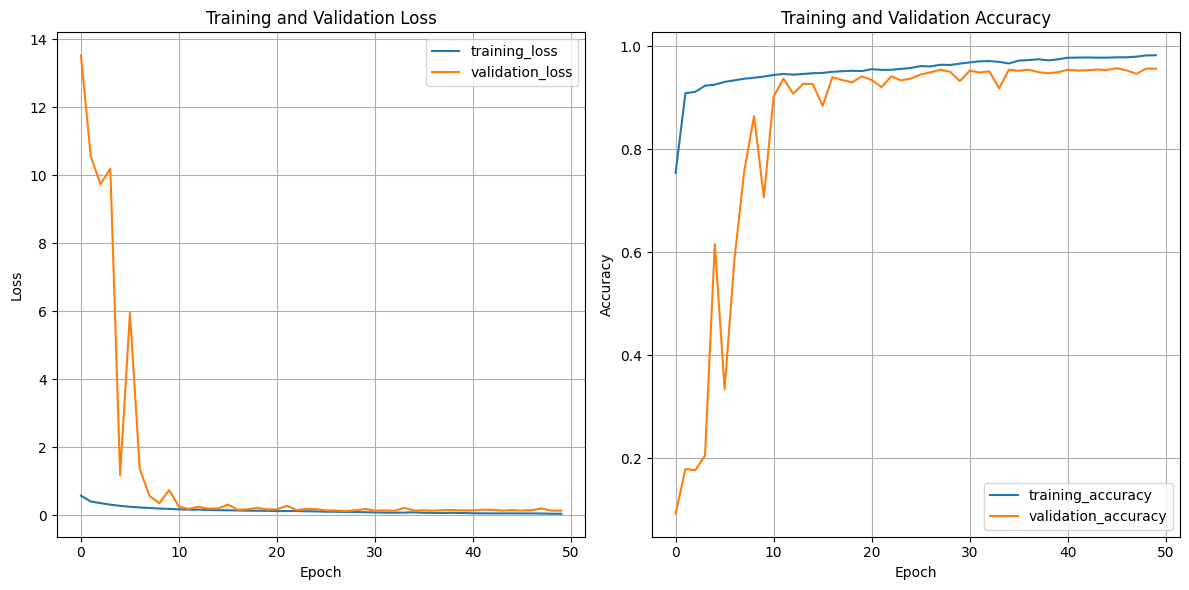

In [18]:
# Plotar os resultados das métricas de treinamento
plt.figure(figsize=(12, 6))

# Subplot para a curva de perda
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='training_loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)

# Subplot para a acurácia de treinamento
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='training_accuracy')
plt.plot(history.history['val_accuracy'], label='validation_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### Imagens da validação

4/4 [==============================] - 1s 31ms/step


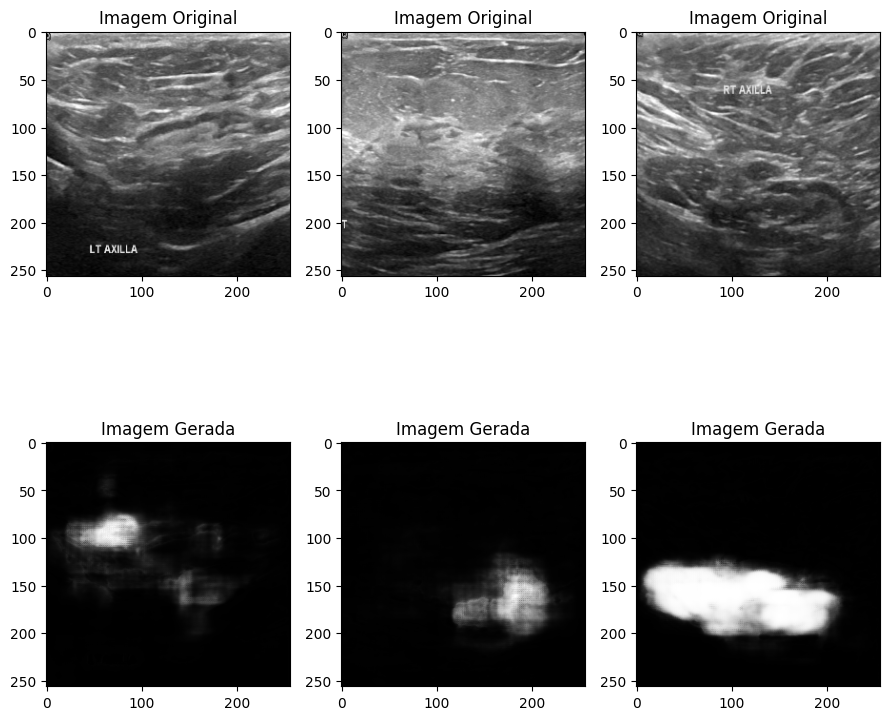

In [19]:
# Fazendo previsões com o modelo nos dados de teste ou validação
predictions = model.predict(images_val)  # Substitua images_val pelos dados de validação

# Supondo que você tenha as imagens de teste em images_test e as imagens geradas pelo modelo em predictions
num_images = len(images_val)

# Plotagem das imagens
num_images_to_plot = min(3, num_images)  # Defina o número de pares de imagens que você quer plotar

plt.figure(figsize=(9, 9))
for i in range(num_images_to_plot):
    plt.subplot(2, num_images_to_plot, i + 1)
    plt.imshow(images_val[i], cmap='gray')  # Mostra a imagem de entrada
    plt.title('Imagem Original')

    plt.subplot(2, num_images_to_plot, i + 1 + num_images_to_plot)
    plt.imshow(predictions[i], cmap='gray')  # Mostra a imagem gerada pelo modelo em escala de cinza
    plt.title('Imagem Gerada')

plt.tight_layout()
plt.show()

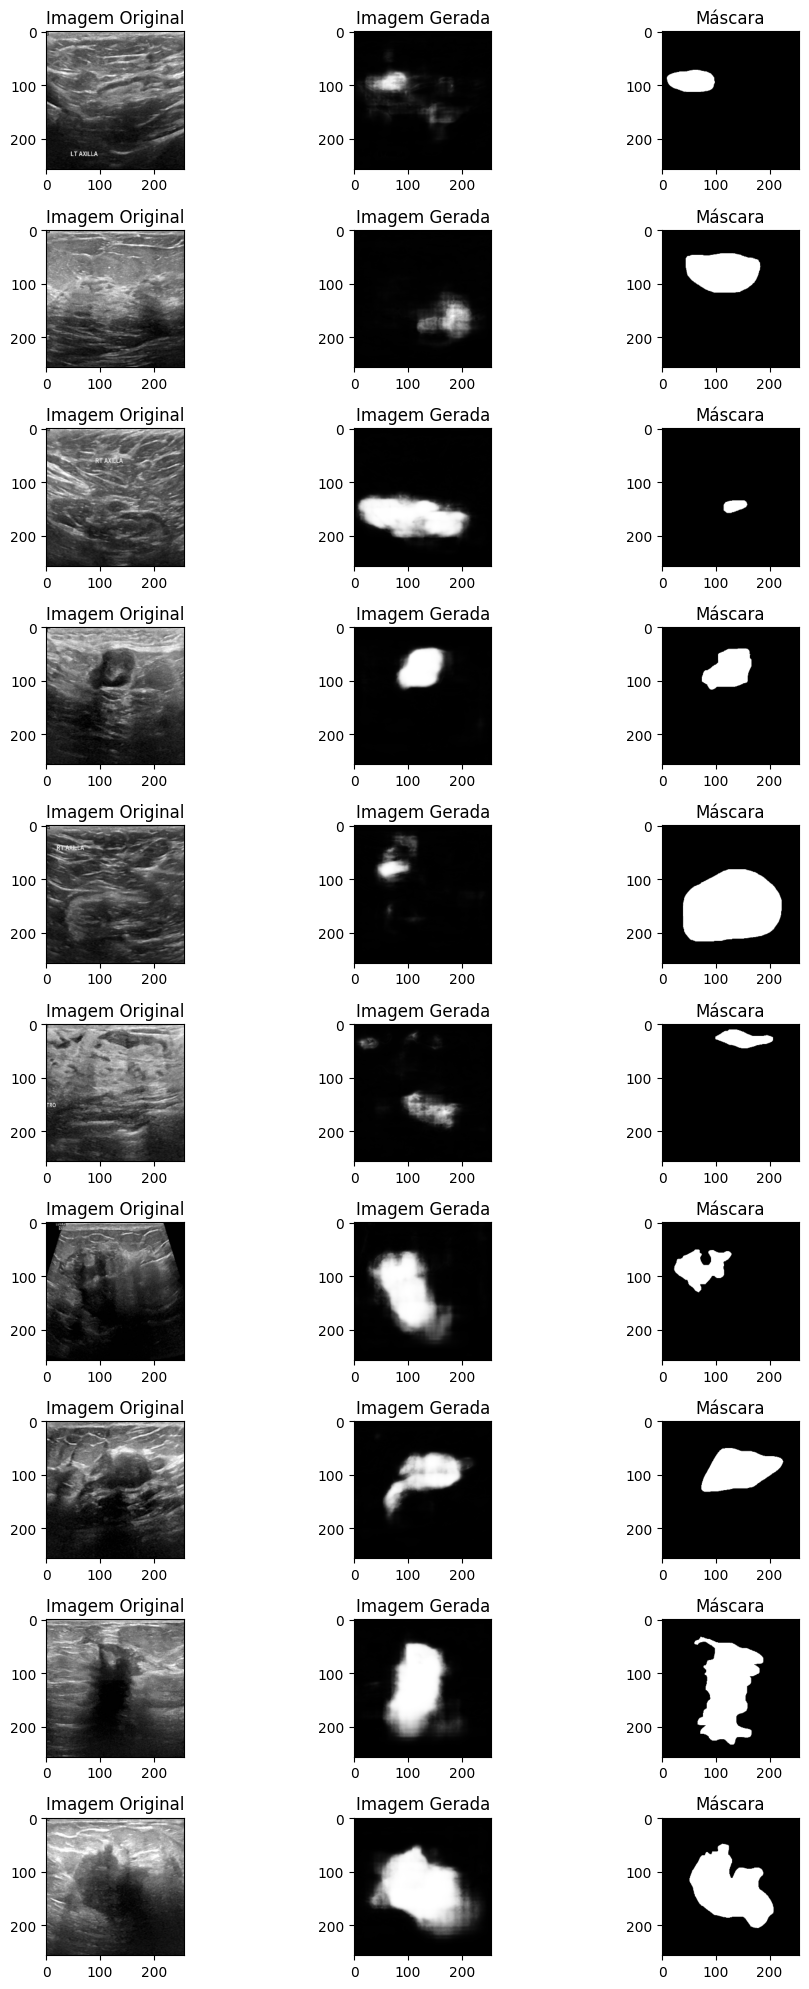

In [20]:
# Plotagem das imagens
num_images_to_plot = min(10, len(images_val))  # Defina o número de pares de imagens que você quer plotar

# Definindo o número de linhas de subplots com base no número de imagens (1 coluna por linha)
num_rows = num_images_to_plot
num_cols = 3  # 3 colunas: Imagem Original, Imagem Gerada e Máscara

plt.figure(figsize=(10, 20))  # Definindo o tamanho da figura

for i in range(num_images_to_plot):
    plt.subplot(num_rows, num_cols, i * num_cols + 1)
    plt.imshow(images_val[i], cmap='gray')  # Mostra a imagem de entrada
    plt.title('Imagem Original')

    plt.subplot(num_rows, num_cols, i * num_cols + 2)
    plt.imshow(predictions[i], cmap='gray')  # Mostra a imagem gerada pelo modelo em escala de cinza
    plt.title('Imagem Gerada')

    plt.subplot(num_rows, num_cols, i * num_cols + 3)
    plt.imshow(masks_val[i], cmap='gray')  # Mostra a máscara
    plt.title('Máscara')

plt.tight_layout()
plt.show()

### Imagens de Teste

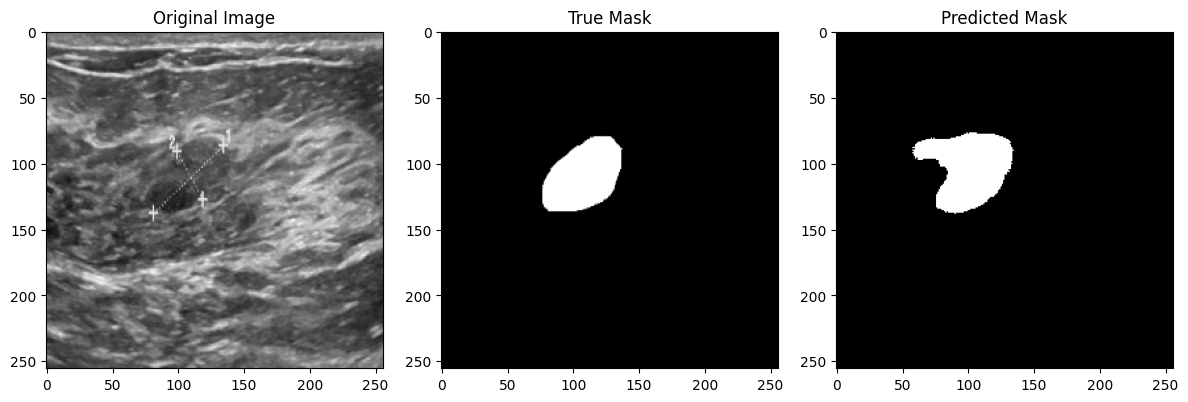

In [18]:
# Visualizando uma imagem de teste
# Selecionar uma imagem aleatória
i = np.random.randint(0, len(images_test))

# Plotar a imagem original
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(images_test[i])
plt.title('Original Image')

# Plotar a verdadeira máscara
plt.subplot(1, 3, 2)
plt.imshow(masks_test[i].squeeze(), cmap='gray')
plt.title('True Mask')

# Plotar a máscara prevista
plt.subplot(1, 3, 3)
plt.imshow(y_pred[i].squeeze(), cmap='gray')
plt.title('Predicted Mask')

plt.tight_layout()
plt.show()


5/5 [==============================] - 0s 31ms/step


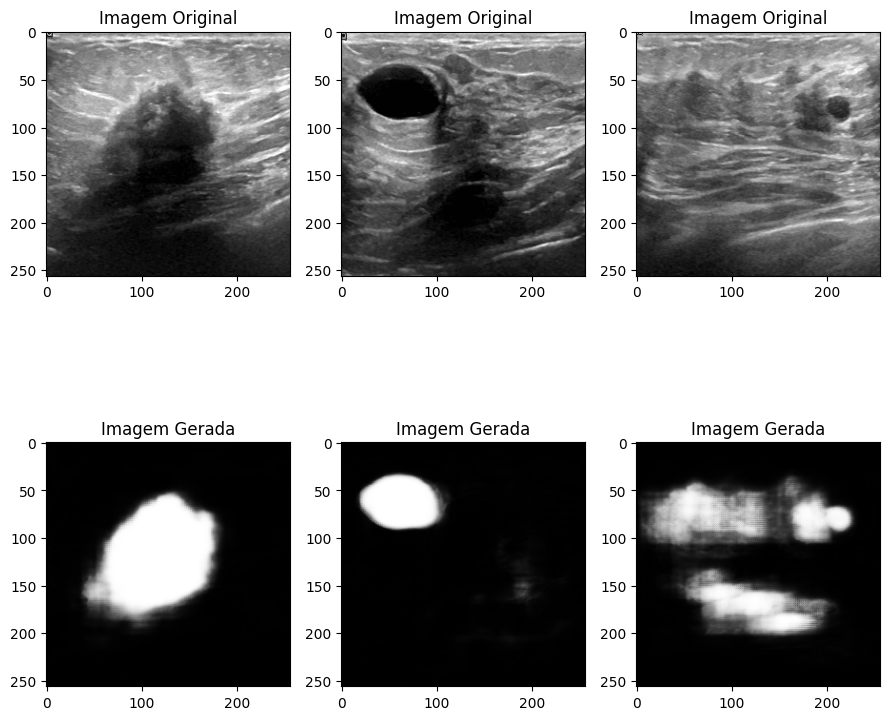

In [21]:
# Fazendo previsões com o modelo nos dados de teste ou validação
predictions = model.predict(images_test)  # Substitua images_val pelos dados de validação

# Supondo que você tenha as imagens de teste em images_test e as imagens geradas pelo modelo em predictions
num_images = len(images_test)

# Plotagem das imagens
num_images_to_plot = min(3, num_images)  # Defina o número de pares de imagens que você quer plotar

plt.figure(figsize=(9, 9))
for i in range(num_images_to_plot):
    plt.subplot(2, num_images_to_plot, i + 1)
    plt.imshow(images_test[i], cmap='gray')  # Mostra a imagem de entrada
    plt.title('Imagem Original')

    plt.subplot(2, num_images_to_plot, i + 1 + num_images_to_plot)
    plt.imshow(predictions[i], cmap='gray')  # Mostra a imagem gerada pelo modelo em escala de cinza
    plt.title('Imagem Gerada')

plt.tight_layout()
plt.show()

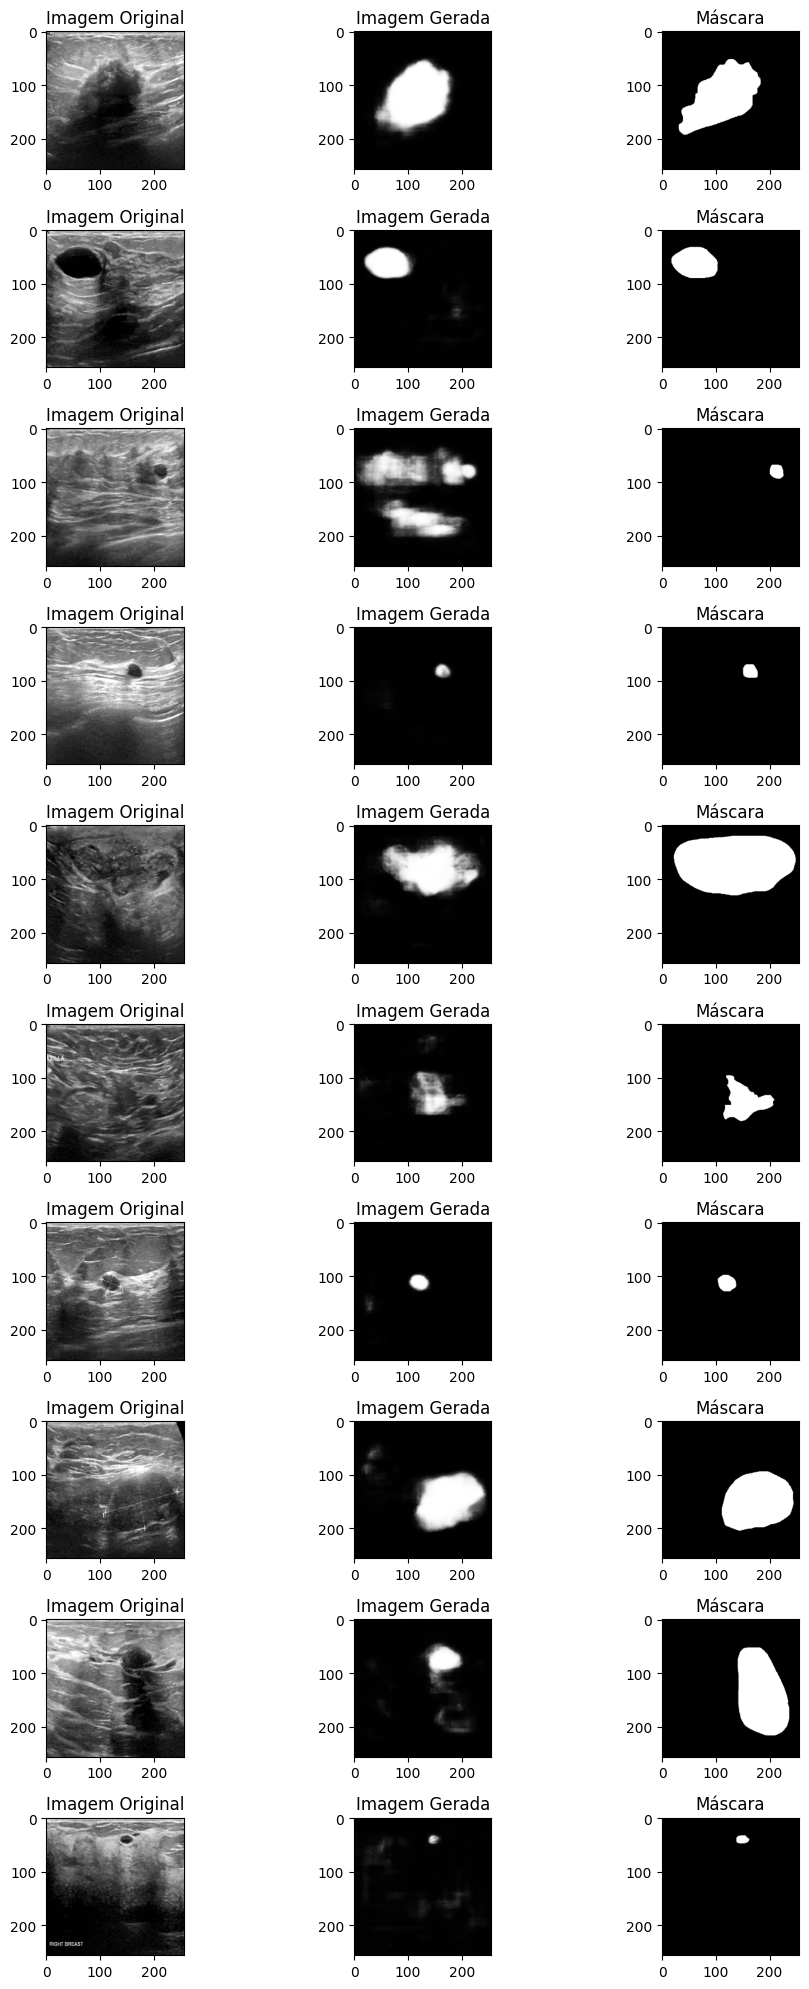

In [22]:
# Plotagem das imagens
num_images_to_plot = min(10, len(images_test))  # Defina o número de pares de imagens que você quer plotar

# Definindo o número de linhas de subplots com base no número de imagens (1 coluna por linha)
num_rows = num_images_to_plot
num_cols = 3  # 3 colunas: Imagem Original, Imagem Gerada e Máscara

plt.figure(figsize=(10, 20))  # Definindo o tamanho da figura

for i in range(num_images_to_plot):
    plt.subplot(num_rows, num_cols, i * num_cols + 1)
    plt.imshow(images_test[i], cmap='gray')  # Mostra a imagem de entrada
    plt.title('Imagem Original')

    plt.subplot(num_rows, num_cols, i * num_cols + 2)
    plt.imshow(predictions[i], cmap='gray')  # Mostra a imagem gerada pelo modelo em escala de cinza
    plt.title('Imagem Gerada')

    plt.subplot(num_rows, num_cols, i * num_cols + 3)
    plt.imshow(masks_test[i], cmap='gray')  # Mostra a máscara
    plt.title('Máscara')

plt.tight_layout()
plt.show()

## Referências

* [U-Net: Convolutional Networks for Biomedical Image Segmentation](https://arxiv.org/abs/1505.04597)

* https://lmb.informatik.uni-freiburg.de/people/ronneber/u-net/

* [Breast Ultrasound Images Dataset](https://www.kaggle.com/datasets/aryashah2k/breast-ultrasound-images-dataset/code)